In [1]:
import numpy as np
import pandas as pd
from prophet import Prophet

In [2]:
# Load Data

df = pd.read_csv('data/AEP_hourly.csv')
df['Date'] = pd.to_datetime(df['Datetime'])
df = df[['Date','AEP_MW']]
df = df.sort_values('Date').reset_index(drop=True)
print(df['Date'].min(),df['Date'].max())
print(df['Date'].max()-df['Date'].min())
df.head()

2004-10-01 01:00:00 2018-08-03 00:00:00
5053 days 23:00:00


,Date,AEP_MW
0,2004-10-01 01:00:00,12379.0
1,2004-10-01 02:00:00,11935.0
2,2004-10-01 03:00:00,11692.0
3,2004-10-01 04:00:00,11597.0
4,2004-10-01 05:00:00,11681.0


In [3]:
df2 = df[df['Date']>='2017'].reset_index(drop=True)

In [16]:
df2.shape

(13896, 2)

In [4]:
ts = pd.DataFrame()
ts['ds'] = df2['Date']
ts['y'] = df2['AEP_MW']

In [5]:
m = Prophet(interval_width=0.95)
model = m.fit(ts)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=24*7,freq='H')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01 00:00:00,16066.822966,11001.758465,17048.340470,16066.822966,16066.822966,-2052.489078,-2052.489078,-2052.489078,-796.874758,-796.874758,-796.874758,-1255.614320,-1255.614320,-1255.614320,0.0,0.0,0.0,14014.333888
1,2017-01-01 01:00:00,16065.524007,10327.503406,16209.860723,16065.524007,16065.524007,-2726.305444,-2726.305444,-2726.305444,-1455.313542,-1455.313542,-1455.313542,-1270.991902,-1270.991902,-1270.991902,0.0,0.0,0.0,13339.218562
2,2017-01-01 02:00:00,16064.225047,9754.728773,15870.641757,16064.225047,16064.225047,-3227.087507,-3227.087507,-3227.087507,-1945.480352,-1945.480352,-1945.480352,-1281.607156,-1281.607156,-1281.607156,0.0,0.0,0.0,12837.137540
3,2017-01-01 03:00:00,16062.926087,9550.136568,15425.337133,16062.926087,16062.926087,-3511.318211,-3511.318211,-3511.318211,-2223.970725,-2223.970725,-2223.970725,-1287.347486,-1287.347486,-1287.347486,0.0,0.0,0.0,12551.607876
4,2017-01-01 04:00:00,16061.627127,9527.985848,16047.352816,16061.627127,16061.627127,-3535.681450,-3535.681450,-3535.681450,-2247.548343,-2247.548343,-2247.548343,-1288.133107,-1288.133107,-1288.133107,0.0,0.0,0.0,12525.945678


In [17]:
(24*30+24*7)

888

In [18]:
forecast[-(24*30+24*7):]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
13175,2018-07-04 01:00:00,15534.944489,11461.814293,17542.855911,15534.944489,15534.944489,-1161.659622,-1161.659622,-1161.659622,-1455.313542,-1455.313542,-1455.313542,293.653920,293.653920,293.653920,0.0,0.0,0.0,14373.284867
13176,2018-07-04 02:00:00,15535.932074,10805.672145,16884.919545,15535.932074,15535.932074,-1648.957671,-1648.957671,-1648.957671,-1945.480352,-1945.480352,-1945.480352,296.522681,296.522681,296.522681,0.0,0.0,0.0,13886.974403
13177,2018-07-04 03:00:00,15536.919658,10674.178619,16482.042794,15536.919658,15536.919658,-1923.224918,-1923.224918,-1923.224918,-2223.970725,-2223.970725,-2223.970725,300.745806,300.745806,300.745806,0.0,0.0,0.0,13613.694740
13178,2018-07-04 04:00:00,15537.907243,10303.722934,16615.740600,15537.907243,15537.907243,-1941.294003,-1941.294003,-1941.294003,-2247.548343,-2247.548343,-2247.548343,306.254340,306.254340,306.254340,0.0,0.0,0.0,13596.613240
13179,2018-07-04 05:00:00,15538.894827,10896.891540,16824.067563,15538.894827,15538.894827,-1669.093273,-1669.093273,-1669.093273,-1982.058642,-1982.058642,-1982.058642,312.965369,312.965369,312.965369,0.0,0.0,0.0,13869.801555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14058,2018-08-09 20:00:00,16406.981712,15183.789611,21651.875847,16249.954250,16588.456757,1882.339971,1882.339971,1882.339971,1350.074529,1350.074529,1350.074529,532.265442,532.265442,532.265442,0.0,0.0,0.0,18289.321683
14059,2018-08-09 21:00:00,16407.969297,15070.139839,21142.410978,16248.971132,16591.159819,1672.595650,1672.595650,1672.595650,1145.685913,1145.685913,1145.685913,526.909737,526.909737,526.909737,0.0,0.0,0.0,18080.564947
14060,2018-08-09 22:00:00,16408.956882,14652.211331,20655.437516,16247.844750,16593.862881,1171.350947,1171.350947,1171.350947,650.405957,650.405957,650.405957,520.944990,520.944990,520.944990,0.0,0.0,0.0,17580.307829
14061,2018-08-09 23:00:00,16409.944466,13900.932961,19932.872196,16246.718368,16596.565943,465.207309,465.207309,465.207309,-49.114573,-49.114573,-49.114573,514.321882,514.321882,514.321882,0.0,0.0,0.0,16875.151776


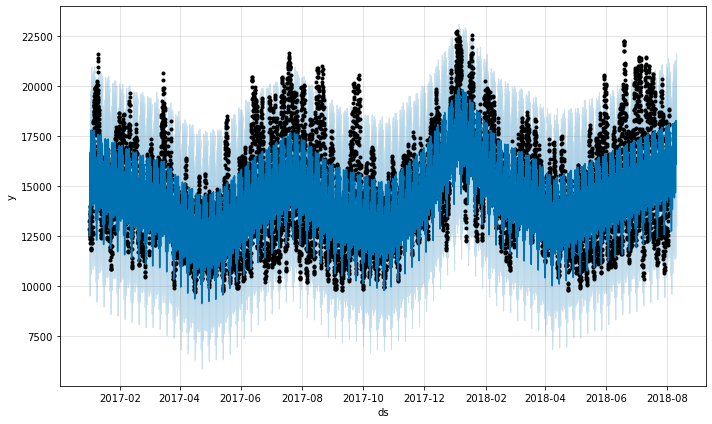

In [29]:
plot1 = m.plot(forecast)

In [21]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
n_future = 24*7

<AxesSubplot:xlabel='ds', ylabel='y'>

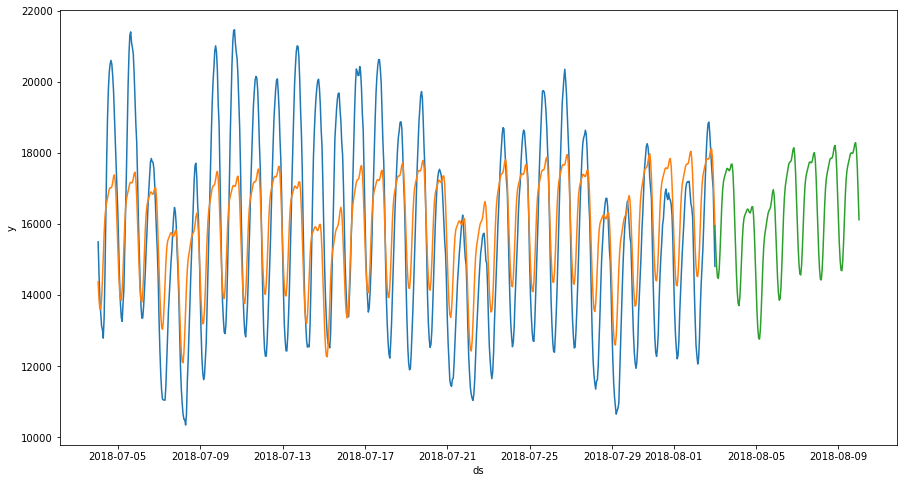

In [25]:
plt.figure(figsize=(15,8))
sns.lineplot(data=ts[-24*30:],x='ds', y='y')
sns.lineplot(data=forecast[-(24*30+n_future):-n_future],x='ds', y='yhat')
sns.lineplot(data=forecast[-(n_future+1):],x='ds', y='yhat')